In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('mnist_train.csv')
test_set = pd.read_csv('mnist_test.csv')

train_Y = np.array(train_set['label'])
train_X = np.array(train_set.iloc[:, 1:])
test_Y = np.array(test_set['label'])
test_X = np.array(test_set.iloc[:, 1:])

test_X = test_X/255
train_X = train_X/255
# plt.imshow(test_X[0].reshape(28,28))

In [4]:
def init_params(m):
    W1 = np.random.randn(m, 784)*np.sqrt(1./m)
    W2 = np.random.randn(10, m)*np.sqrt(1./10)
    return W1, W2

def relu(X, derivative=False):
    if derivative:
        return X>0
    return np.maximum(0, X)

def softmax(x, derivative=False):
    exps = np.exp(x-x.max())
    if derivative:
        return exps/np.sum(exps, axis=0) * (1-exps/np.sum(exps, axis=0))
    return (exps)/np.sum(exps, axis=0)
    # print(np.exp(X), np.sum(np.exp(X)))

def forward_pass(X, W1, W2):
    Z1 = np.dot(W1, X) 
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) 
    A2 = softmax(Z2)
    return A2, A1, Z1, Z2

def back_pass(A2, A1, Y, X, W2, Z1):
    one_hot_Y = np.zeros(10, dtype=int)
    one_hot_Y[Y] = 1
    dZ2 = 2*(A2 - one_hot_Y)/(A2.shape[0])*softmax(A2, derivative=True)
    dW2 = np.outer(dZ2, A1)
    dZ1 = 2*np.dot(W2.T, dZ2)*relu(Z1, derivative=True)
    dW1 = np.outer(dZ1, X)
    return dW2, dW1

def update(dW1, dW2, W1, W2, lr):
    W2 = W2 - lr*dW2
    W1 = W1 - lr*dW1
    return W1, W2


In [5]:
def compute_accuracy(W1, W2):
    acc = []
    for (j, k) in zip(test_X, test_Y):
        A2, A1, Z1, Z2 = forward_pass(j, W1, W2)
        acc.append(np.argmax(A2) == k)
    return np.sum(acc)/len(acc)

def train(train_X, train_Y, lr, iterations):
    W1, W2 = init_params(256)
    for i in range(iterations):
        # np.random.shuffle(train_X)
        # np.random.shuffle(train_Y)
        for (j, k) in zip(train_X, train_Y):
            A2, A1, Z1, Z2 = forward_pass(j, W1, W2)
            dW2, dW1 = back_pass(A2, A1, k, j, W2, Z1)
            W1, W2 = update(dW1, dW2, W1, W2, lr)
        print(compute_accuracy(W1, W2))
        
    return W1, W2

    


In [8]:
W1, W2 = train(train_X, train_Y, 0.01, 1)

0.93


4
4


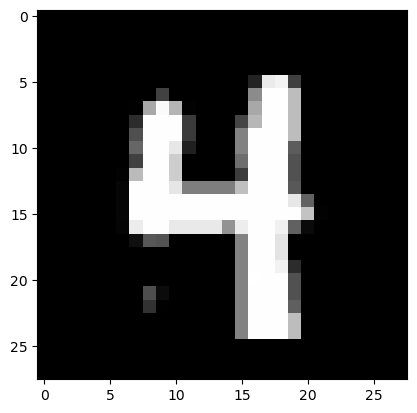

In [9]:
X = test_X[8484].reshape(28,28)
a, b, c, d = forward_pass(test_X[8484], W1, W2)
print(np.argmax(a))
print(test_Y[8484])
plt.imshow(X, cmap='gray')

In [ ]:
train_X = np.random.shuffle(train_X)
train_Y = np.random.shuffle(train_Y)
print(train_Y)

None
